In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

torch.set_printoptions(linewidth=120)

In [2]:
# def prepare_data_loader():
#   train_set = torchvision.datasets.FashionMNIST(
#       root='./data/FashionMNIST',
#       train=True,
#       download=True,
#       transform=transforms.Compose([
#           transforms.ToTensor()
#       ])
#   )
#   train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
#   return train_loader

In [3]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  def forward(self, t):
    # input layer
    x = t

    # conv1 layer
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12

    # conv2 layer
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4

    # reshapre
    x = x.reshape(-1, 12 * 4 * 4)

    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)

    # output layer
    x = self.out(x)
    # x = F.softmax(x, dim=1)
    return x

In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9255992.53it/s] 


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 211179.47it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2941398.32it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5148373.15it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [5]:
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size = 32, 
    shuffle = True
)

In [6]:
len(train_set)

60000

In [7]:
def show_images_batch_from_loader(loader):
  batch = next(iter(loader))
  images, labels = batch
  grid = torchvision.utils.make_grid(images, nrow=10)
  plt.figure(figsize=(15,15))
  plt.imshow(np.transpose(grid, (1,2,0)))
  print('labels:', labels)

labels: tensor([7, 6, 0, 7, 4, 1, 9, 1, 0, 2, 4, 4, 7, 8, 7, 4, 6, 1, 8, 5, 8, 7, 4, 7, 2, 5, 5, 3, 8, 0, 5, 8])


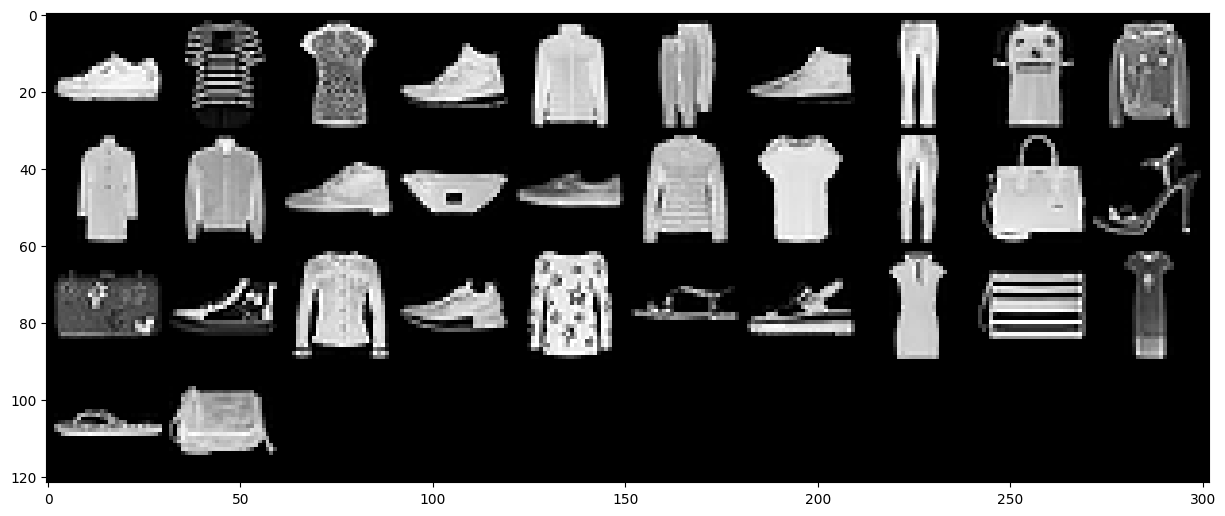

In [8]:
show_images_batch_from_loader(train_loader)

In [9]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [10]:
# def train_model(model, train_loader, optimizer, epochs):
#   for epoch in range(epochs):
#     total_loss = 0
#     total_correct = 0
#     for batch in train_loader:
#       images, labels = batch
#       preds = model(images)
#       loss = F.cross_entropy(preds, labels)

#       optimizer.zero_grad()
#       loss.backward()
#       optimizer.step()

#       total_loss += loss.item()
#       total_correct += get_num_correct(preds, labels)
#     print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

In [11]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 46928 loss: 1089.4749049693346
epoch 1 total_correct: 50210 loss: 841.3356580361724
epoch 2 total_correct: 50617 loss: 815.8351860642433
epoch 3 total_correct: 50854 loss: 781.347111672163
epoch 4 total_correct: 51082 loss: 767.9227699935436
epoch 5 total_correct: 51221 loss: 757.1275128126144
epoch 6 total_correct: 51344 loss: 755.7598810493946
epoch 7 total_correct: 51244 loss: 759.7737188972533
epoch 8 total_correct: 51336 loss: 757.385115608573
epoch 9 total_correct: 51505 loss: 743.3047829270363
